In [76]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Mall_Customers.csv')

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
df.rename({'Annual Income (k$)':'Income',
           'Spending Score (1-100)':'Spend_score'}, axis=1,inplace=True)

In [81]:
df

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [82]:
df.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


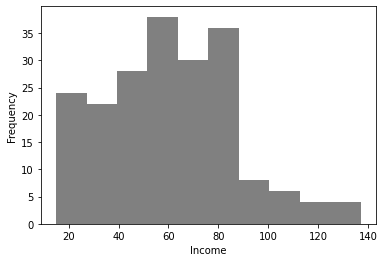

In [83]:
df.Income.plot.hist(color='gray')
plt.xlabel('Income')
plt.show()

A good proportion of customers seems to lie in the 50k-90k
range. These can be considered moderate-income customers. Customers
earning less than 40k would be low-income customers. We can use these cutoffs
to divide the customers into three groups, as in the following figure. The dotted
segments denote the cutoffs/thresholds.

Create a new column, Cluster, to have the Low Income,
Moderate Income, and High earners values for customers with incomes
in the ranges < 50, 50–90, and >= 90 respectively using the following code:

In [84]:
df.loc[df.Income >= 90, 'Cluster'] = 'High Earners'
df.loc[(df.Income <= 90) & (df.Income >= 50), 'Cluster'] = 'Moderate Income'
df.loc[df.Income < 50, 'Cluster'] = 'Low Income'

In [85]:
df['Cluster']

0        Low Income
1        Low Income
2        Low Income
3        Low Income
4        Low Income
           ...     
195    High Earners
196    High Earners
197    High Earners
198    High Earners
199    High Earners
Name: Cluster, Length: 200, dtype: object

In [86]:
df.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High Earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


These methods can still intuition base of experience based biases. This can be avoided by using unsupervised algos.

"Clustering is a type of unsupervised machine learning technique that looks
for groups or clusters in data without knowing them ahead of time. The
following are some of the advantages and disadvantages of using clustering for
customer segmentation."

To be able to group customers based on continuous variables, we first need to
rescale these parameters such that the data is on similar scales. Why? Take age
and income, for instance. These are on very different scales. It is quite common to
see annual incomes of two persons that differ by $10,000, but it would be very odd
to see their ages differ by 10,000 years. Therefore, we need to better control how
the change in one variable impacts the overall similarity between customers. For
example, we may want an age difference of 10 years between two customers to be
treated equivalent to an income difference of $10,000. However, making these kinds
of determinations manually for each variable would be difficult. This is the reason
why we typically standardize the data, to put them all on a standard scale.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

The scaler object has methods to fit on a given dataset. Fitting here would
mean calculating the mean and the standard deviation for each of the columns. To
apply the transformation, you simply need to use the transform method of the
scaler object. To perform both of these actions in a single step, calculate the mean
and standard deviation (that is, fit) and then apply the transformation (that is,
transform), or you can simply use the fit_transform method, as shown in the
following code:
scaler.fit_transform (data_orig[cols])

In [88]:
# Let's now apply standardization to the mall customer data in the next exercise.
cols_to_scale = ['Age', 'Income', 'Spend_score']
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [89]:
df_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


The mean value for all the columns is practically 0 and the standard deviation
for all is 1. This confirms that the standardization has worked.

In this exercise, you will calculate the Euclidean distance between three customers.
The goal of the exercise is to be able to calculate the similarity between customers.
A similarity calculation is a key step in customer segmentation. After standardizing
the Income and Spend_score fields for the first three customers as in the
following table (Figure 3.14), you will calculate the distance using the cdist method
from scipy. 

In [90]:
sel_cols = ['Income', 'Spend_score']
cust3 = df_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [91]:
from scipy.spatial.distance import cdist
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

K-means clustering is a very common unsupervised learning technique with a wide
range of applications. It is powerful because it is conceptually relatively simple, scales
to very large datasets, and tends to work well in practice. 

K-means clustering is an algorithm that tries to find the best way of grouping data
points into k different groups, where k is a parameter given to the algorithm. For
now, we will choose k arbitrarily. We will revisit how to choose k in practice in the next
chapter.

In [92]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

The fit method of the KMeans object creates the
specified number of clusters from the dataset. cols is a list containing the columns
from the data dataset to be used for clustering. After the model has been fit, the
predict method is used to extract the cluster assignments for each record in
the dataset. The cluster assignments can be added to the original dataset as a new
column, as in the preceding example.

In this exercise, you will use machine learning to discover natural groups in the mall
customers. You will perform k-means clustering on the mall customer data that was
standardized in the previous exercise. You will use only the Income and
Spend_score columns.

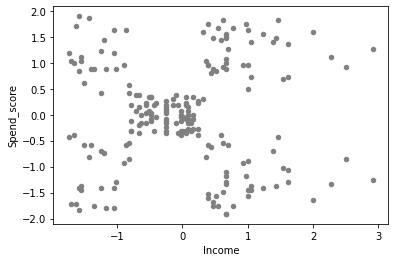

In [93]:
df_scaled.plot.scatter(x='Income', y='Spend_score', \
 color='gray')
plt.show()

In [94]:
cluster_cols = ['Income', 'Spend_score']
model.fit(df_scaled[cluster_cols])
df_scaled['Cluster'] = model.predict(df_scaled[cluster_cols])


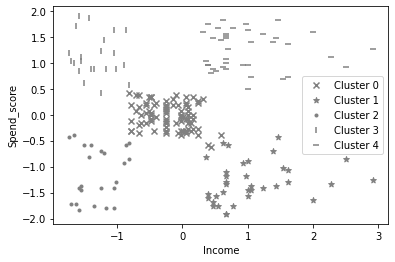

In [95]:
markers = ['x', '*', '.', '|', '_']
for clust in range(5):
 temp = df_scaled[df_scaled.Cluster == clust]
 plt.scatter(temp.Income, temp.Spend_score, \
 marker=markers[clust], \
 color = 'gray',\
 label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

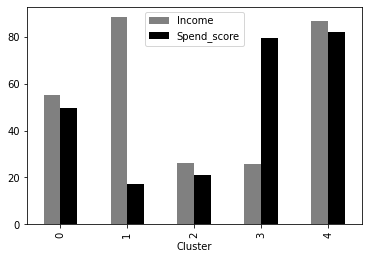

In [96]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[['Income', 'Spend_score']].mean()\
 .plot.bar(color=['gray','black'])
plt.show()

Dealing with high dimensional data


In [97]:
cluster_cols = ['Age', 'Income', 'Spend_score']
df_scaled[cluster_cols].head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [98]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_scaled[cluster_cols])
df_scaled['Cluster'] = model.predict(df_scaled[cluster_cols])

In [99]:
df_scaled

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,2
2,3,Female,-1.352802,-1.700830,-1.715913,2
3,4,Female,-1.137502,-1.700830,1.040418,2
4,5,Female,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,1
196,197,Female,0.441365,2.497807,-0.861839,0
197,198,Male,-0.491602,2.497807,0.923953,1
198,199,Male,-0.491602,2.917671,-1.250054,0


In [116]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
# take the columns to reduce the dimensionality from and get it as a 2d array.
pca_res = pca.fit_transform(df_scaled[cluster_cols])


In [101]:
df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]

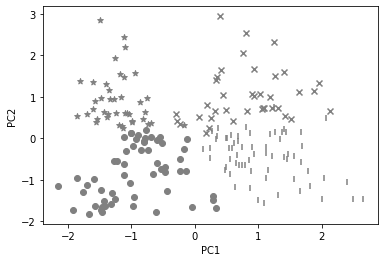

In [102]:
markers = ['x', '*', 'o','|']
for clust in range(4):
    # creating temporary dataframe
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
    label="Cluster "+str(clust), \
    color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [103]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


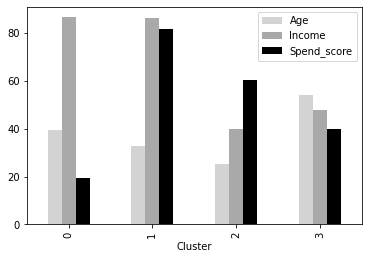

In [104]:
df.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean().plot.bar(color=['lightgray', 'darkgray', 'black'])
plt.show()

You can see that all three columns vary significantly across the clusters. You 
have cluster 0 with the highest average income but the lowest spend score and 
average age. You have cluster 2, which is average in age, high on income, and 
the highest on spending. Let's describe these better in the next step


Cluster 0: Middle-aged penny pinchers (high income, low spend)  
Cluster 1: Young high rollers (younger age, high income, high spend)  
Cluster 2: Young aspirers (low income, high spend)  
Cluster 3: Old average Joes (average income, average spend)  

It is important to realize and remember that "clustering," the 
actual grouping of the customers, is a part of the overall exercise. Standardization 
of the variables, choosing the right criteria for segmentation, and building a good 
understanding of the clusters are all critical steps. Not to mention the importance of 
business stakeholders in getting the most actionable customer segments

#### Mean-shift clustering is an interesting algorithm in contrast to the k-means algorithm because unlike k-means, it does not require you to specify the number of clusters.  


The intuition of its working is rather simple – it works by starting at each
data point and shifting the data points (assigning them to clusters) toward the area
of greatest density – that is, towards a natural cluster centroid. When all the data
points have found their local density peak, the algorithm is complete. This tends to
be computationally expensive, so this method does not scale well to large datasets
(k-means clustering, on the other hand, scales very well). 

![Mean Shift Clustering](images/mean_shift_algo.png)

While not needing to choose the number of clusters sounds great, there is another
hyper-parameter that strongly influences the behavior of the algorithm - bandwidth.
Also referred to as window size, bandwidth defines how far each data point will look
when searching for a higher density area. As you can expect, a higher bandwidth
would allow points to look farther and get linked to farther away clusters and can
lead to fewer, looser, larger clusters. Consider the image for Step 1 in Figure 4.11: if an
extremely high bandwidth parameter (close to 1) were employed, all the points would
have been lumped into one cluster. On the other hand, a lower value of bandwidth
may result in a higher number of tight clusters. Referring again to Step 1 of Figure 4.11,
if we used a very low value of bandwidth (close to 0) we would have arrived at dozens
of clusters. The parameter, therefore, has a strong impact on the result and needs to
be balanced.

For the Python implementation for estimating bandwidth, you will employ the
estimate_bandwidth utility in scikit-learn.

In [105]:
mall_scaled = df_scaled.copy()

In [106]:
from sklearn.cluster import MeanShift, estimate_bandwidth
cluster_cols = ["Income", "Spend_score"]
bandwidth = 0.9
# print(bandwidth)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])

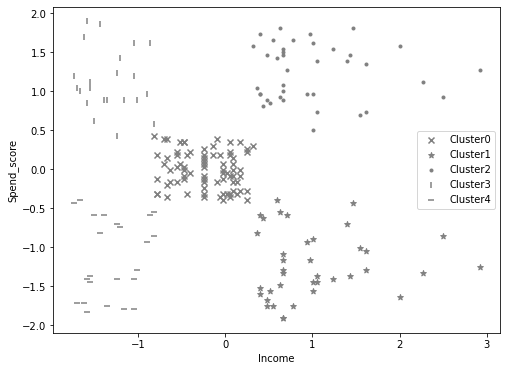

In [107]:
markers = ['x', '*', '.', '|', '_', '1', '2']
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
 temp = mall_scaled[mall_scaled.Cluster == clust]
 plt.scatter(temp.Income, temp.Spend_score, \
 marker=markers[clust], \
 label="Cluster"+str(clust), \
 color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

In [108]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.15)
# decide quantile by trial and error

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])

In [109]:
mall_scaled['Cluster'].nunique()

5

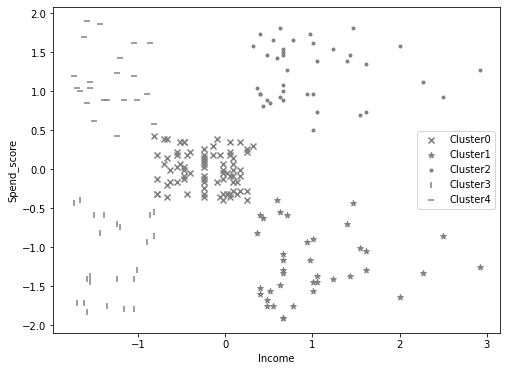

In [110]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, 
    marker=markers[clust], 
    label="Cluster"+str(clust), 
    color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

Benefits of mean-shift algorithm  
1. We don't need to pre-specify the number of clusters.  
2. The single parameter, bandwidth, has a physical meaning and its effects are
easy to interpret.
3. It can identify complex-shaped clusters (k-means only gave spherical/
globular clusters).  
4. Robust to outliers.  

### Using silhoette score to pick an optimum number of clusters

In [111]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]


In [112]:
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

Import the silhouette_score method from sklearn and calculate the
average silhouette score for the current cluster assignments with three clusters
using the code that follows:

In [113]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


Note that this number by itself is not intuitive
and may not mean much, but is useful as a relative measure, as we will see in
the next step.

Now that you know how to calculate the silhouette score, you can calculate the
scores, looping over different values of K (2-10), as follows:


In [114]:
silhouette_scores = []
for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

Plotting

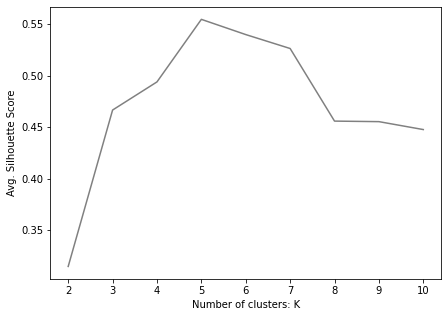

In [115]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

From the preceding plot, you can infer that K=5 has the best silhouette score
and is therefore the optimal number of clusters.

In such cases, supplement the silhouette scores and
elbow method with your business understanding/ inputs from business
teams to choose the right number of clusters.